### Code to generate a sequenceof samples, based on one hot encoding using recurrent neural networks

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
def parseMatrixFromFile(fname):
    with open(fname) as f:
        for l in f:
            print(l)
            yield [int(x) for x in l.strip().split()]

In [4]:
rhythm_data_ = list(parseMatrixFromFile("mus_dataset_1.txt"))

74 72 62 62 69 67 69 62 62 62 65 69 67 69 62 62 65 69 67 69 72 71 72 71 69 65 69 67 69 62 62 74 74 74 74 74 77 74 69 67 65 65 64 65 67 69 73 74 76 79 76 74 72 69 67 62 62 56 63 61 65 68 66 70 72 73 75 72 70 70 68 66 65 68 63 63 56 58 61 63 65 66 68 70 73 74 80 74 73 72 70 68 67 69 73 74 69 69 74 69 62 65 69 74 74 74 74 77 76 74 69 69 79 79 76 76 72 76 79 76 72 72 67 64 72 76 72 76 79 76 72 69 65 69 74 68 67 65 65 62 65 69 73 74 69 67 67 62 69 67 69 62 62 65 69 67 68 69 62 72 71 72 71 69 69 80 77 73 70 68 66 65 63 63 61 65 63 66 65 68 66 70 68 72 70 73 75 72 68 74 76 77 79 76 72 69 72 76 79 76 72 74 72 71 69 69 62 65 69 67 69 73 74 76 72 69 65 68 69 62 62


In [5]:
rhythm_data_ = rhythm_data_[0]

In [6]:
len(rhythm_data_)

221

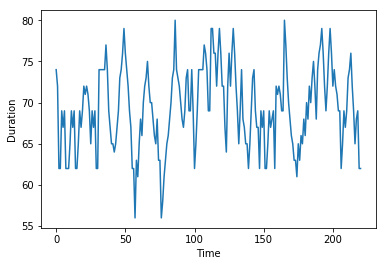

In [12]:
x = [i for (i,x) in enumerate(rhythm_data_)]

plt.plot(x,rhythm_data_)
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()

In [13]:
memory = 10

In [14]:
rhythm_data = []
ini = 0
end = ini + memory
while end < len(rhythm_data_):
    #print(rhythm_data_[ini:end])
    rhythm_data.append(rhythm_data_[ini:end])
    ini = ini + 1
    end = end + 1

In [15]:
rhythm_data

[[74, 72, 62, 62, 69, 67, 69, 62, 62, 62],
 [72, 62, 62, 69, 67, 69, 62, 62, 62, 65],
 [62, 62, 69, 67, 69, 62, 62, 62, 65, 69],
 [62, 69, 67, 69, 62, 62, 62, 65, 69, 67],
 [69, 67, 69, 62, 62, 62, 65, 69, 67, 69],
 [67, 69, 62, 62, 62, 65, 69, 67, 69, 62],
 [69, 62, 62, 62, 65, 69, 67, 69, 62, 62],
 [62, 62, 62, 65, 69, 67, 69, 62, 62, 65],
 [62, 62, 65, 69, 67, 69, 62, 62, 65, 69],
 [62, 65, 69, 67, 69, 62, 62, 65, 69, 67],
 [65, 69, 67, 69, 62, 62, 65, 69, 67, 69],
 [69, 67, 69, 62, 62, 65, 69, 67, 69, 72],
 [67, 69, 62, 62, 65, 69, 67, 69, 72, 71],
 [69, 62, 62, 65, 69, 67, 69, 72, 71, 72],
 [62, 62, 65, 69, 67, 69, 72, 71, 72, 71],
 [62, 65, 69, 67, 69, 72, 71, 72, 71, 69],
 [65, 69, 67, 69, 72, 71, 72, 71, 69, 65],
 [69, 67, 69, 72, 71, 72, 71, 69, 65, 69],
 [67, 69, 72, 71, 72, 71, 69, 65, 69, 67],
 [69, 72, 71, 72, 71, 69, 65, 69, 67, 69],
 [72, 71, 72, 71, 69, 65, 69, 67, 69, 62],
 [71, 72, 71, 69, 65, 69, 67, 69, 62, 62],
 [72, 71, 69, 65, 69, 67, 69, 62, 62, 74],
 [71, 69, 6

In [16]:
data_y = [e[memory-1] for e in rhythm_data]

In [17]:
data_X = [e[:-1] for e in rhythm_data]

In [18]:
print(data_X[0])
print(data_y[0])
print(rhythm_data[0])

[74, 72, 62, 62, 69, 67, 69, 62, 62]
62
[74, 72, 62, 62, 69, 67, 69, 62, 62, 62]


In [19]:
# reshape X to be [samples, time_steps, features]
X = np.reshape(data_X, (len(data_X), len(data_X[0]), 1))

# one hot encode the output variable
y = np_utils.to_categorical(data_y)
#y = data_y

In [20]:
print(y[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [21]:
print(np.shape(X))
print(np.shape(y))

(211, 9, 1)
(211, 81)


In [22]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [25]:
with tf.device('/gpu:0'):
    #model.fit(X, y, epochs=500, batch_size=128, callbacks=callbacks_list)
    model.fit(X, y, epochs=500, batch_size=32)

Epoch 1/500
211/211 [==============================] - 4s - loss: 3.8074     
Epoch 2/500
211/211 [==============================] - 2s - loss: 3.0660     
Epoch 3/500
211/211 [==============================] - 2s - loss: 2.9024     
Epoch 4/500
211/211 [==============================] - 2s - loss: 2.9166     
Epoch 5/500
211/211 [==============================] - 3s - loss: 2.7943     
Epoch 6/500
211/211 [==============================] - 2s - loss: 2.8020     
Epoch 7/500
211/211 [==============================] - 2s - loss: 2.7765     
Epoch 8/500
211/211 [==============================] - 3s - loss: 2.7862     
Epoch 9/500
211/211 [==============================] - 3s - loss: 2.7658     
Epoch 10/500
211/211 [==============================] - 3s - loss: 2.8054     
Epoch 11/500
211/211 [==============================] - 3s - loss: 2.7974     
Epoch 12/500
211/211 [==============================] - 3s - loss: 2.7691     
Epoch 13/500
211/211 [==============================] - 3s - 

211/211 [==============================] - 2s - loss: 0.3170     
Epoch 207/500
211/211 [==============================] - 2s - loss: 0.3001     
Epoch 208/500
211/211 [==============================] - 2s - loss: 0.2998     
Epoch 209/500
211/211 [==============================] - 3s - loss: 0.2594     
Epoch 210/500
211/211 [==============================] - 3s - loss: 0.2752     
Epoch 211/500
211/211 [==============================] - 2s - loss: 0.2738     
Epoch 212/500
211/211 [==============================] - 3s - loss: 0.2619     
Epoch 213/500
211/211 [==============================] - 2s - loss: 0.2507     
Epoch 214/500
211/211 [==============================] - 2s - loss: 0.2639     
Epoch 215/500
211/211 [==============================] - 2s - loss: 0.2359     
Epoch 216/500
211/211 [==============================] - 2s - loss: 0.2346     
Epoch 217/500
211/211 [==============================] - 3s - loss: 0.2523     
Epoch 218/500
211/211 [==============================]

211/211 [==============================] - 2s - loss: 0.0796     
Epoch 411/500
211/211 [==============================] - 3s - loss: 0.0769     
Epoch 412/500
211/211 [==============================] - 2s - loss: 0.0540     
Epoch 413/500
211/211 [==============================] - 2s - loss: 0.0623     
Epoch 414/500
211/211 [==============================] - 2s - loss: 0.0480     
Epoch 415/500
211/211 [==============================] - 2s - loss: 0.0489     
Epoch 416/500
211/211 [==============================] - 3s - loss: 0.0484     
Epoch 417/500
211/211 [==============================] - 2s - loss: 0.0516     
Epoch 418/500
211/211 [==============================] - 2s - loss: 0.0472     
Epoch 419/500
211/211 [==============================] - 2s - loss: 0.0427     
Epoch 420/500
211/211 [==============================] - 3s - loss: 0.0447     
Epoch 421/500
211/211 [==============================] - 3s - loss: 0.0327     
Epoch 422/500
211/211 [==============================]

In [26]:
generated_rhythm = []
# Should be a multiple of len(rhythm_data[0])
num_samples = len(rhythm_data_)

start = np.random.randint(0, len(data_X)-1)
pattern = data_X[start]
print("Seed:")
print(pattern)

# generate sequence with a random seed
for i in range(num_samples):
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    
    generated_rhythm.append(index)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("Generation Completed!")

Seed:
[67, 62, 62, 56, 63, 61, 65, 68, 66]
Generation Completed!


In [27]:
len(generated_rhythm)

221

In [28]:
print(generated_rhythm)

[70, 72, 73, 75, 72, 70, 70, 68, 66, 65, 68, 63, 63, 56, 58, 61, 63, 65, 66, 68, 70, 73, 74, 80, 74, 73, 72, 70, 68, 67, 69, 73, 74, 69, 69, 74, 69, 62, 65, 69, 74, 74, 74, 74, 77, 76, 74, 69, 69, 79, 79, 76, 76, 72, 76, 79, 76, 72, 72, 67, 64, 72, 76, 72, 76, 79, 76, 72, 69, 65, 69, 74, 68, 67, 65, 65, 62, 65, 69, 73, 74, 69, 67, 67, 62, 69, 67, 69, 62, 62, 65, 69, 67, 68, 69, 62, 72, 71, 72, 71, 69, 69, 80, 77, 73, 70, 68, 66, 65, 63, 63, 61, 65, 63, 66, 65, 68, 66, 70, 68, 72, 70, 73, 75, 72, 68, 74, 76, 77, 79, 76, 72, 69, 72, 76, 79, 76, 72, 74, 72, 71, 69, 69, 62, 65, 69, 67, 69, 73, 74, 76, 72, 69, 65, 68, 69, 62, 62, 56, 58, 61, 63, 65, 66, 68, 70, 73, 74, 80, 74, 73, 72, 70, 68, 67, 69, 73, 74, 69, 69, 74, 69, 62, 65, 69, 74, 74, 74, 74, 77, 76, 74, 69, 69, 79, 79, 76, 76, 72, 76, 79, 76, 72, 72, 67, 64, 72, 76, 72, 76, 79, 76, 72, 69, 65, 69, 74, 68, 67, 65, 65]


In [ ]:
def write_to_file(filename, arg_list):
    file = open(filename, 'w')
    for item in arg_list:
        file.write(str(item)+" ")
    file.close()
    print("Output dumped to file ",filename)

In [ ]:
write_to_file("mus_dataset_1_output.txt",generated_rhythm)

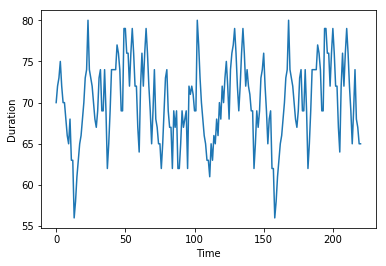

In [29]:
x = [i for (i,x) in enumerate(generated_rhythm)]

plt.plot(x,generated_rhythm)
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()